In [21]:
import spartan2.ioutil as ioutil
import spartan2.basicutil as iatutil
import spartan2.drawutil as drawutil

In [22]:
infile = './inputData/test.reid.gz'
outfile='../output/test.iat.gz'
aggts = ioutil.extracttimes(infile, outfile=outfile, timeidx=0, timeformat='%Y-%m-%d %H:%M:%S', delimeter='\x01',
                        isbyte=True, comments='#', nodetype=str, groupids=[1])

	processing file test.reid.gz


In [23]:
instance = iatutil.IAT()

In [24]:
# calculate aggiat dict
instance.calaggiat(aggts)

In [25]:
aggiat=instance.aggiat
instance.save_aggiat('../output/testiat.dictlist.gz')
instance.load_aggiat('../output/testiat.dictlist.gz')
aggiat2=instance.aggiat
len(aggiat), len(aggiat2)

(308, 308)

In [26]:
xs, ys = instance.getiatpairs()
len(xs), len(ys)

(160, 160)

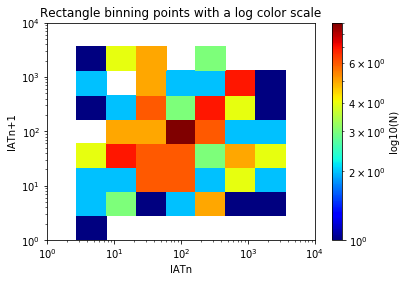

In [27]:
hist = drawutil.drawRectbin(xs, ys, gridsize=10, xlabel='IATn', ylabel='IATn+1')